## Importing libraries

In [1]:
#libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn import svm


## Importing dataset

In [2]:
#import data 
df = pd.read_csv("data/marketing campaign.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


## Data preprocessing

#### Checking for null or NA values

In [5]:
df.isnull ()
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df = df.dropna()

#### Checking for Outliers

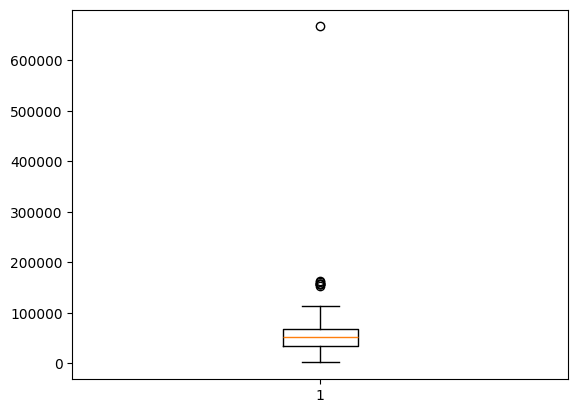

In [7]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

#### Handling outliers in the data

In [8]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))


# Remove the outliers in the Income column
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]


Number of outliers in the Income column: 8


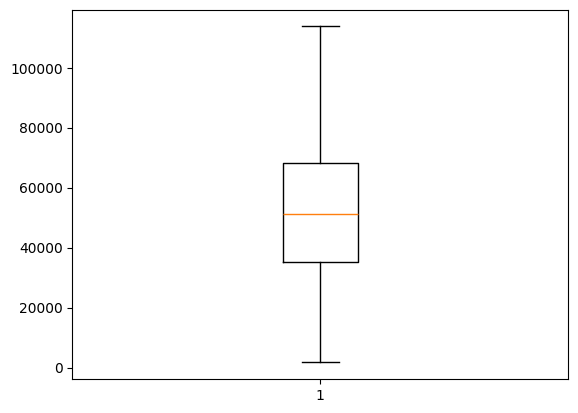

In [9]:
# Plot the distribution of a column to visualize the outliers
plt.boxplot(df['Income'])
plt.show()

In [10]:
#statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.0,2208.0,2208.000000
mean,5586.900815,1968.807065,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,...,5.334239,0.073822,0.074275,0.073370,0.064312,0.013587,0.009511,3.0,11.0,0.150815
std,3249.110303,11.991913,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,...,2.413837,0.261541,0.262278,0.260801,0.245363,0.115795,0.097081,0.0,0.0,0.357950
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8418.500000,1977.000000,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
# Deleting rows where the status is Absurd, alone, YOLO
df = df.drop(df[df['Marital_Status'] == 'Absurd'].index)
df = df.drop(df[df['Marital_Status'] == 'Alone'].index)
df = df.drop(df[df['Marital_Status'] == 'YOLO'].index)

## Feature Engineering

In [12]:
# creating feature for total spending
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# creating feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# creating feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

# creating feature for average spend
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']

# creating feature for total campaign accepted
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


In [13]:
# Classifying education level as High, Middle, Low
def education_level(education):
    if education in ["Graduation","phD","Master"]:
        return "high"
    elif education in ["Basic"]:
        return "Middle"
    else:
        return "Low"
    
df["Education_level"] = df["Education"].apply(education_level)

#### Dropping unwanted columns

In [14]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue','Year_Birth', 'ID', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
df = df.drop(to_drop, axis=1)

In [15]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response',
       'total_spending', 'avg_web_visits', 'online_purchase_ratio',
       'Average_Spend', 'Total_Campaigns_Accepted', 'Education_level'],
      dtype='object')

## Exploratory Data Analysis

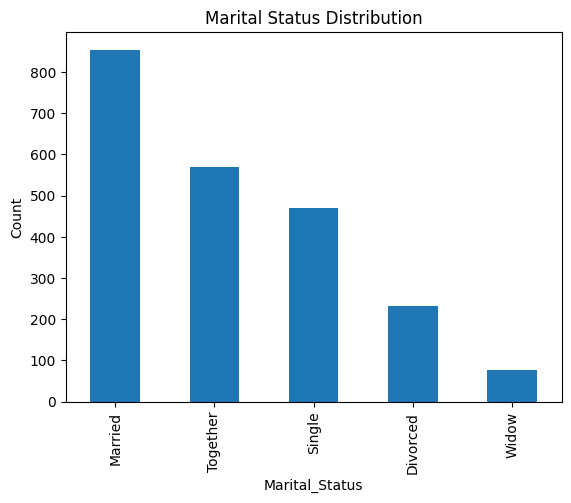

In [16]:
#Bar Chart
df["Marital_Status"].value_counts().plot(kind="bar")
plt.ylabel("Count")
plt.title("Marital Status Distribution")
plt.show()

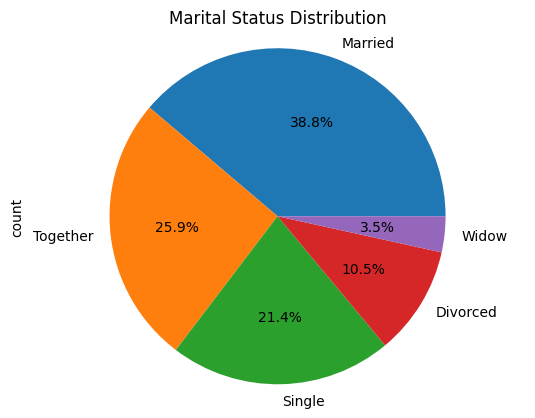

In [17]:
#Pie chart
df["Marital_Status"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.title("Marital Status Distribution")
plt.show()

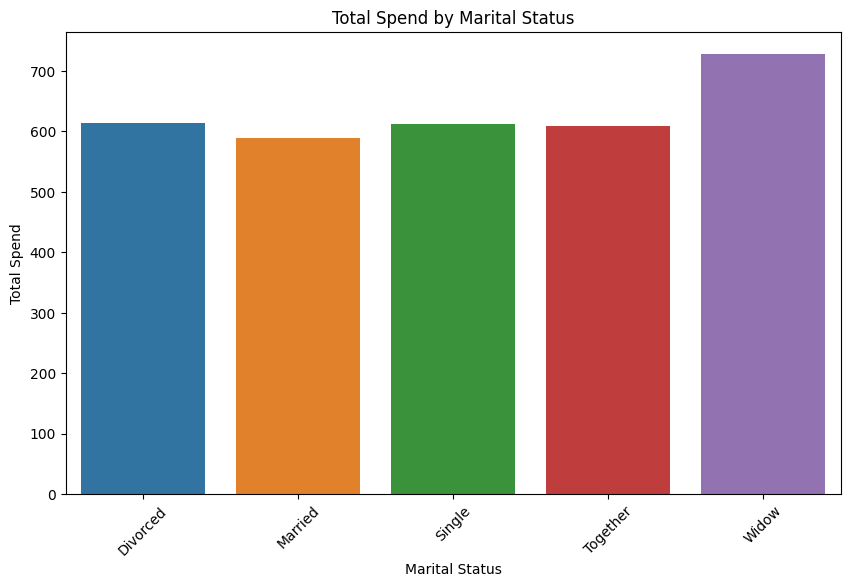

In [18]:

avg_spend_by_marital_status = df.groupby('Marital_Status')['total_spending'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))

sns.barplot(x=avg_spend_by_marital_status.index, y=avg_spend_by_marital_status.values)

# Customize the plot
plt.xlabel('Marital Status')
plt.ylabel('Total Spend')
plt.title('Total Spend by Marital Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

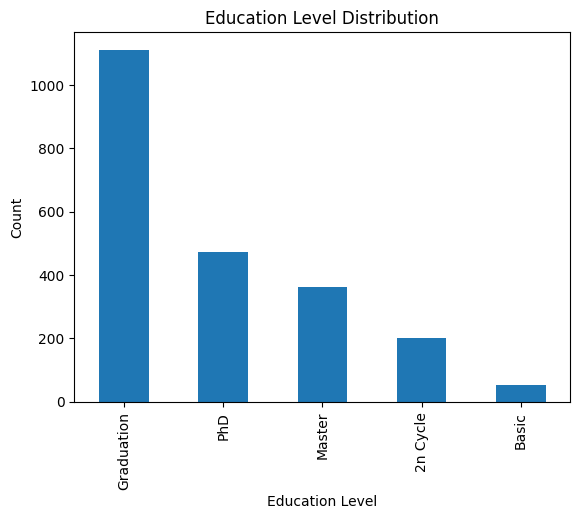

In [19]:
#Education count
df["Education"].value_counts().plot(kind="bar")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Level Distribution")
plt.show()

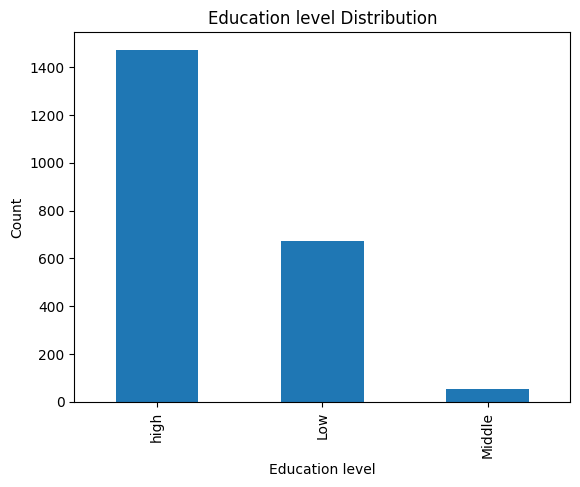

In [20]:
# Education Level Distribution
df['Education_level'].value_counts().plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Education level")
plt.title("Education level Distribution")
plt.show()

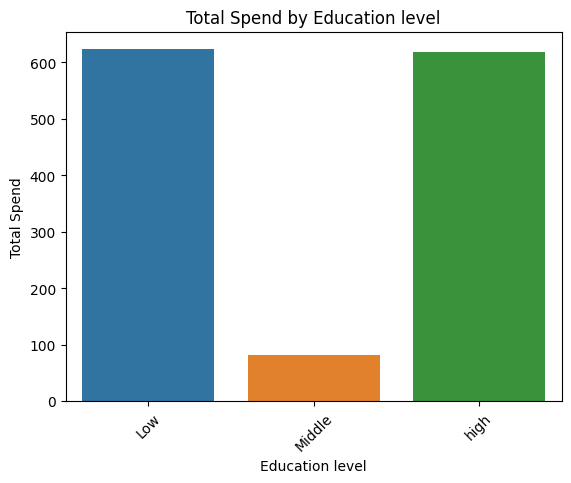

In [21]:
avg_spend_by_education_level = df.groupby('Education_level')['total_spending'].mean()

# Create a bar plot
sns.barplot(x=avg_spend_by_education_level.index, y=avg_spend_by_education_level.values)

# Customize the plot
plt.xlabel('Education level')
plt.ylabel('Total Spend')
plt.title('Total Spend by Education level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

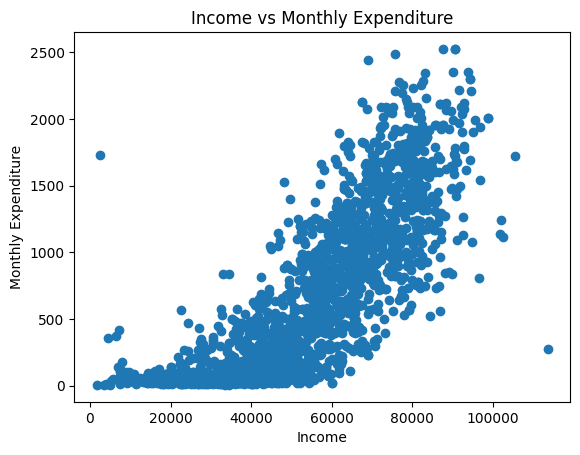

In [22]:
plt.scatter(df["Income"], df["total_spending"])
plt.xlabel("Income")
plt.ylabel("Monthly Expenditure")
plt.title("Income vs Monthly Expenditure")
plt.show()

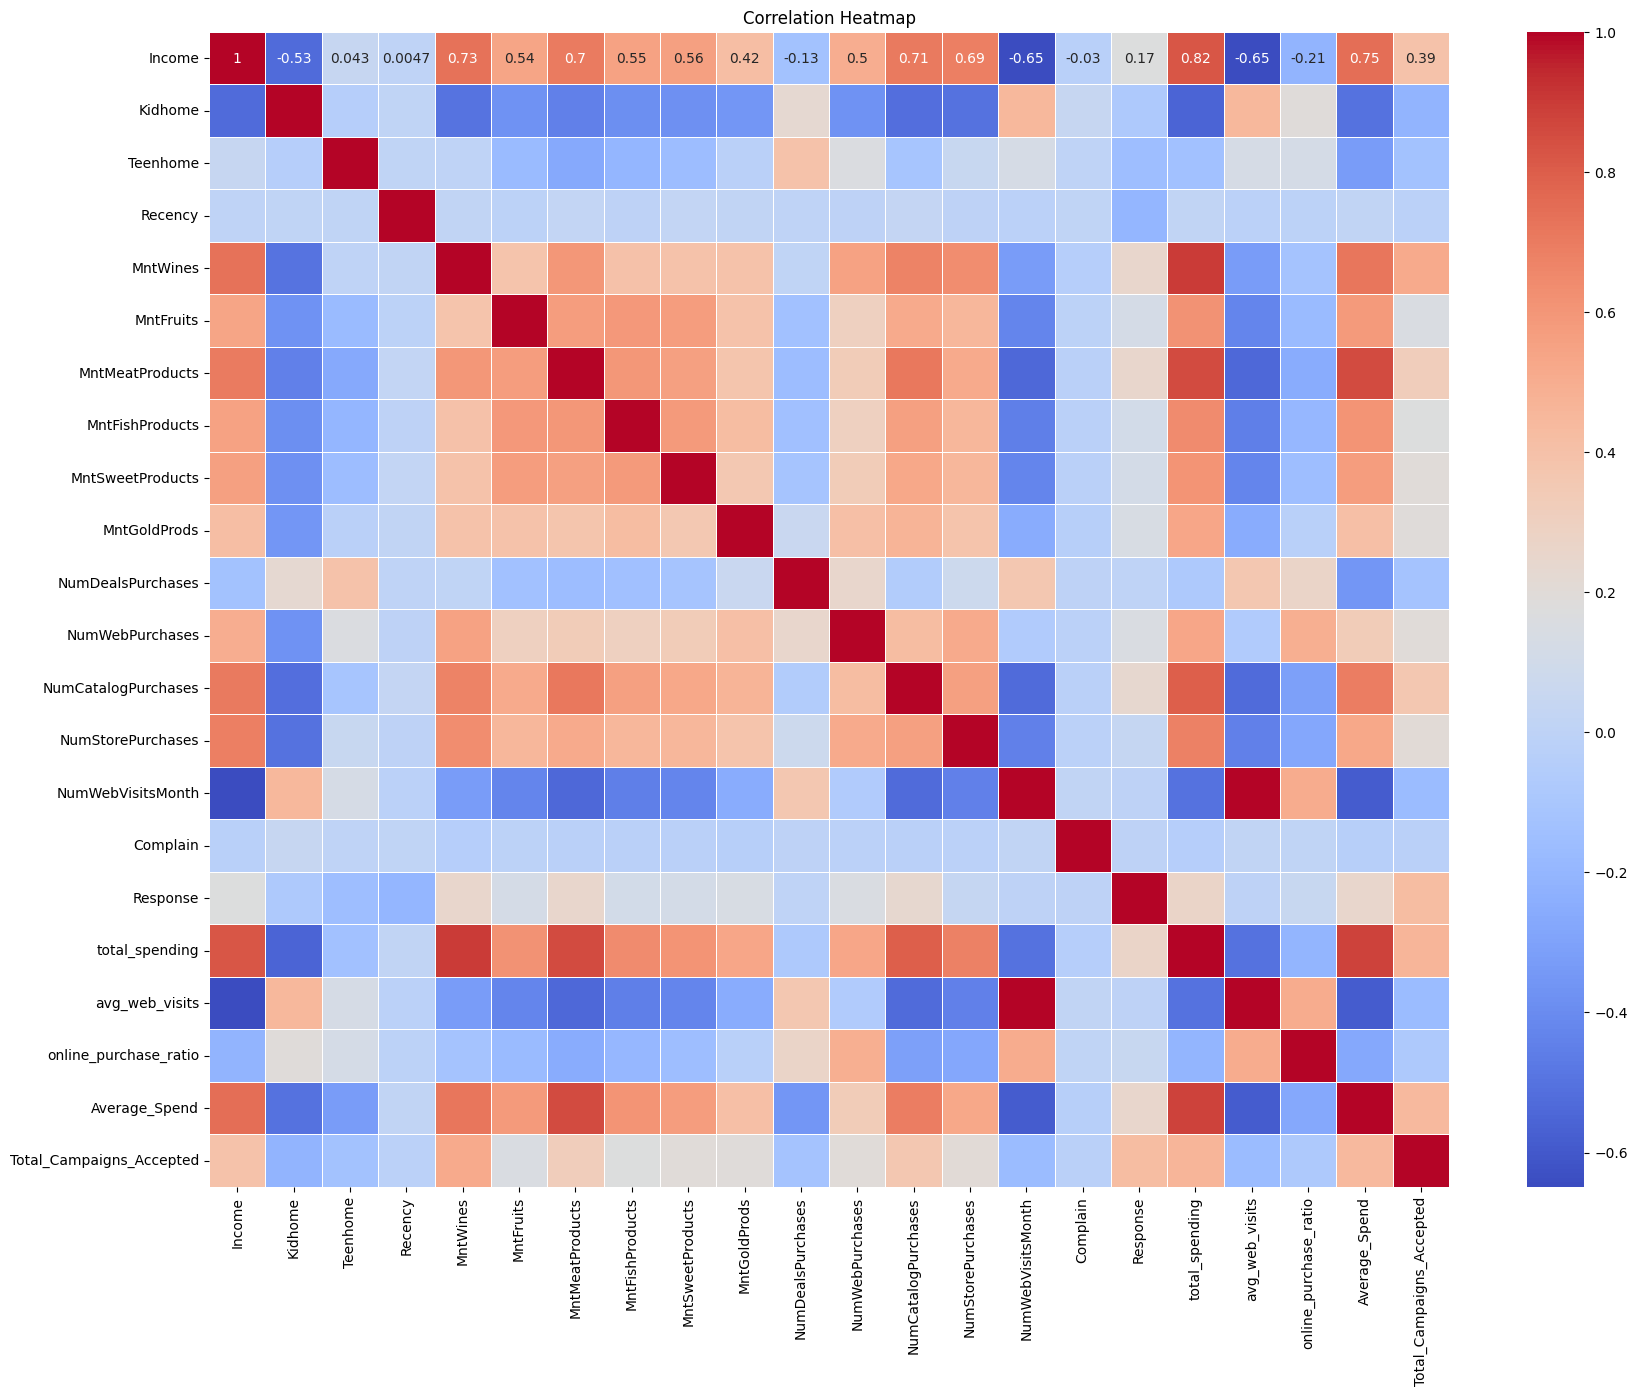

In [23]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Correlation Heatmap
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

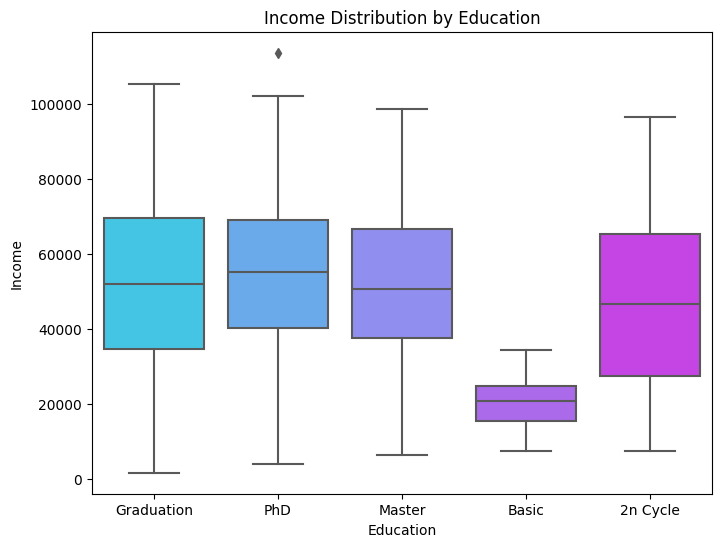

In [24]:
#edcation and income
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Education"], y=df["Income"], palette="cool")
plt.xlabel("Education")
plt.ylabel("Income")
plt.title("Income Distribution by Education")
plt.show()

## Model Building and Evaluation

In [25]:
# Drop rows with missing values
df.dropna(inplace=True)

# Select relevant columns for the model
columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Recency',
           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
           'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 
           'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
           'Complain', 'NumDealsPurchases']

# Retain only the selected columns and the target variable 'Response'
df = df[columns + ['Response']]

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Split the data into features (X) and target (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8590909090909091
Precision: 0.5769230769230769
Recall: 0.22727272727272727
F1 Score: 0.32608695652173914


c:\Users\avika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:

y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       374
           1       0.58      0.23      0.33        66

    accuracy                           0.86       440
   macro avg       0.73      0.60      0.62       440
weighted avg       0.83      0.86      0.83       440



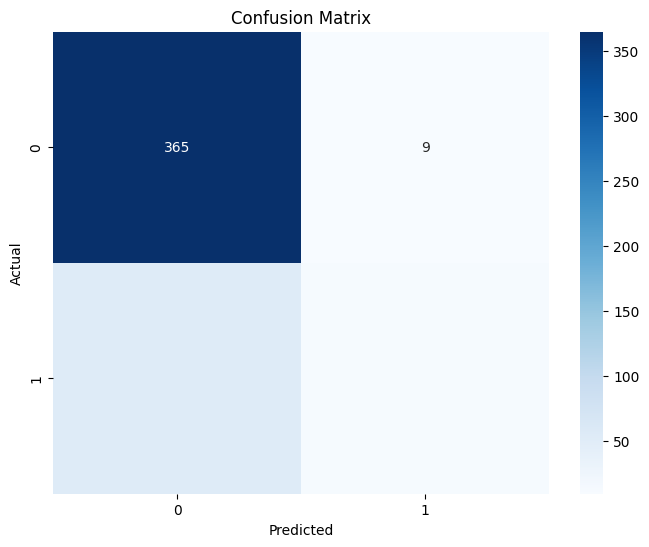

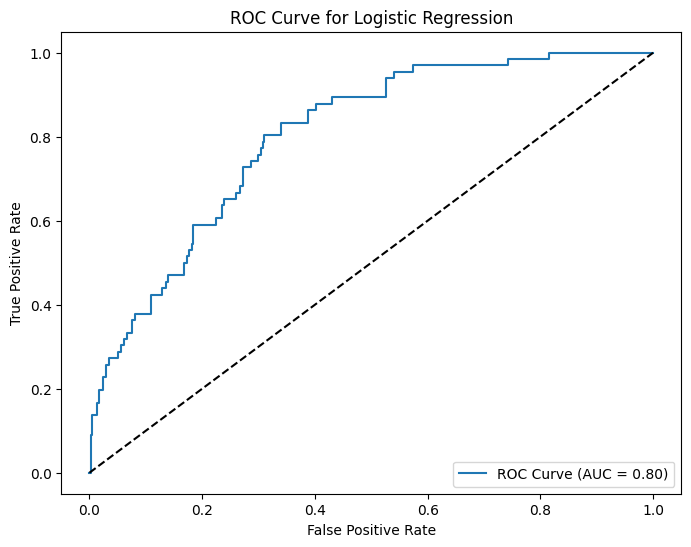

In [32]:
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [28]:
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_model.predict(X_test)
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[365,   9],
       [ 54,  12]], dtype=int64)

In [29]:
svm_model.score(X_test, y_test)

0.8568181818181818

In [30]:
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, F1-score, and accuracy
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)
print("\nClassification Report:")
print(classification_rep)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Confusion Matrix:
[[365   9]
 [ 54  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       374
           1       0.57      0.18      0.28        66

    accuracy                           0.86       440
   macro avg       0.72      0.58      0.60       440
weighted avg       0.83      0.86      0.82       440

Accuracy: 0.8568181818181818
Precision: 0.5714285714285714
Recall: 0.18181818181818182
F1 Score: 0.27586206896551724


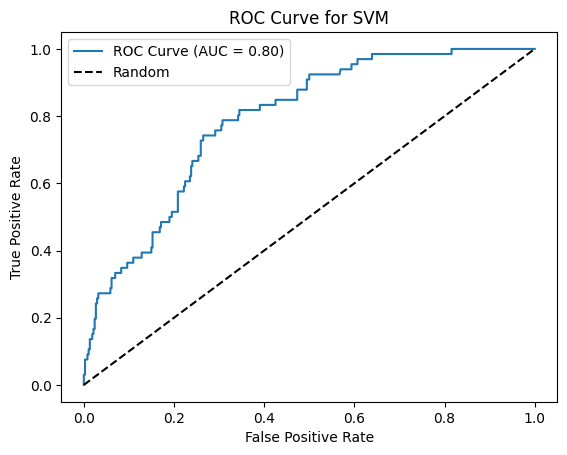

In [33]:
decision_scores = svm_model.decision_function(X_test)

# Calculate false positive rate, true positive rate, and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)


# Plot ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()